In [662]:
import tweepy
import pandas as pd
import configparser
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [663]:
config = configparser.ConfigParser()
config.read("config.ini")

['config.ini']

In [664]:
api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]
access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

In [665]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [666]:
#posts = tweepy.Cursor(api.user_timeline, screen_name="ArvindKejriwal", count = 200, tweet_mode="extended").items((300))

In [667]:
posts = tweepy.Cursor(api.search_tweets, q="#bitcoin", count = 200, lang ="en", tweet_mode="extended").items((1000))

In [668]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [669]:
df

,Tweets
0,#Bitcoin 📈 \n\n▓▓▓▓▓▓░░░░░░░░░ 42%\n\nprice:$4...
1,RT @ShibaZuna: Here's a glimpse of our Nft Gam...
2,RT @ICOAnnouncement: 🎙 New Project\n\n🔷 SafeMo...
3,RT @DancingDeerNFT: 💎#NFTGiveaway💎\n\nTo celeb...
4,@disclosetv Send #Bitcoin \n\nhttps://t.co/Sko...
...,...
995,RT @ShibaZuna: Here's a glimpse of our Nft Gam...
996,RT @cryptocatin: $1800 in #Bitcoin for Winner ...
997,RT @saylor: “I am in for the long haul. #Bitco...
998,Join me at Wirex! If you register and buy some...


In [670]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags=re.UNICODE)

In [671]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub("\n","",text) # Removing hyperlink
    text = re.sub(":","",text) # Removing hyperlink
    text = re.sub("_","",text) # Removing hyperlink
    text = emoji_pattern.sub(r'', text)
    return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
discard = ["CNFTGiveaway", "IVEAWAYPrizes", "Giveaway", "Airdrop"]
df = df[~df["Tweets"].str.contains('|'.join(discard))]

In [672]:
df

,Tweets
0,Bitcoin 42%price$41343.59 eth/btc 0.07
1,Here's a glimpse of our Nft Game that we are ...
2,New Project SafeMoneyBSC (SAFEMONEY) SafeMon...
4,Send Bitcoin
5,ale Bitcoin nice move.
...,...
995,Here's a glimpse of our Nft Game that we are ...
996,$1800 in Bitcoin for Winner Just Like &amp; ...
997,“I am in for the long haul. Bitcoin is here t...
998,Join me at Wirex! If you register and buy some...


In [673]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

<ipython-input-673-d444dd8f48c6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
<ipython-input-673-d444dd8f48c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['Tweets'].apply(getPolarity)


,Tweets,Subjectivity,Polarity
0,Bitcoin 42%price$41343.59 eth/btc 0.07,0.000000,0.000000
1,Here's a glimpse of our Nft Game that we are ...,0.400000,-0.400000
2,New Project SafeMoneyBSC (SAFEMONEY) SafeMon...,0.454545,0.136364
4,Send Bitcoin,0.000000,0.000000
5,ale Bitcoin nice move.,1.000000,0.600000
...,...,...,...
995,Here's a glimpse of our Nft Game that we are ...,0.400000,-0.400000
996,$1800 in Bitcoin for Winner Just Like &amp; ...,0.000000,0.000000
997,“I am in for the long haul. Bitcoin is here t...,0.441667,-0.283333
998,Join me at Wirex! If you register and buy some...,0.000000,0.000000


In [674]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

<ipython-input-674-5984e99df0d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Analysis'] = df['Polarity'].apply(getAnalysis)


,Tweets,Subjectivity,Polarity,Analysis
0,Bitcoin 42%price$41343.59 eth/btc 0.07,0.000000,0.000000,Neutral
1,Here's a glimpse of our Nft Game that we are ...,0.400000,-0.400000,Negative
2,New Project SafeMoneyBSC (SAFEMONEY) SafeMon...,0.454545,0.136364,Positive
4,Send Bitcoin,0.000000,0.000000,Neutral
5,ale Bitcoin nice move.,1.000000,0.600000,Positive
...,...,...,...,...
995,Here's a glimpse of our Nft Game that we are ...,0.400000,-0.400000,Negative
996,$1800 in Bitcoin for Winner Just Like &amp; ...,0.000000,0.000000,Neutral
997,“I am in for the long haul. Bitcoin is here t...,0.441667,-0.283333,Negative
998,Join me at Wirex! If you register and buy some...,0.000000,0.000000,Neutral


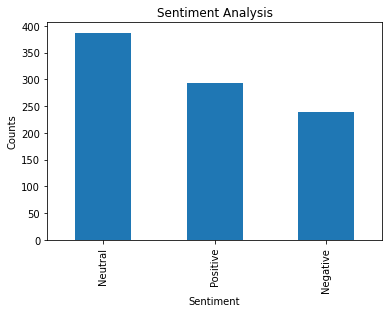

In [675]:


# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

